# **Présentation de notre projet**

In [744]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [755]:
nombre_patient = 100
nombre_docteur = 20

In [756]:
def position (n):
    return (np.random.uniform(0,1,size = (n)), np.random.uniform(0,1,size = (n)))
    

In [757]:
position_docteur = position(nombre_docteur)
position_patient = position(nombre_patient)
position_docteur

(array([0.43653779, 0.26756455, 0.63944686, 0.05143228, 0.66517149,
        0.82651196, 0.10820154, 0.87622304, 0.23413906, 0.75964899,
        0.71894992, 0.82289619, 0.23990115, 0.80193593, 0.94453169,
        0.22072381, 0.79981322, 0.93941178, 0.88578335, 0.87071113]),
 array([0.3928313 , 0.3532333 , 0.61080867, 0.25416629, 0.86094307,
        0.382858  , 0.9444199 , 0.95392533, 0.49999317, 0.87533389,
        0.35684473, 0.02484648, 0.13727077, 0.7121594 , 0.18370835,
        0.44938306, 0.31046484, 0.07549385, 0.68692079, 0.17608883]))

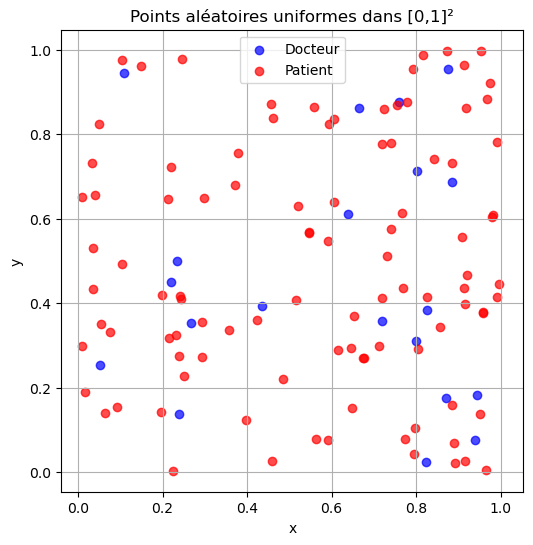

In [758]:
#On représente les points sur un graphe
plt.figure(figsize=(6, 6))
plt.scatter(position_docteur[0], position_docteur[1], color='blue', alpha=0.7, label="Docteur")
plt.scatter(position_patient[0], position_patient[1], color='red', alpha=0.7, label="Patient")
plt.title("Points aléatoires uniformes dans [0,1]²")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axis('square')
plt.legend()
plt.show()

In [759]:
matrice_distance = np.zeros((nombre_patient, nombre_docteur))
for j in range(nombre_docteur):
    for i in range(nombre_patient):
        matrice_distance[i,j] = np.sqrt((position_patient[1][i]-position_docteur[1][j])**2+(position_patient[0][i]-position_docteur[0][j])**2)
matrice_distance

array([[0.49971836, 0.67256883, 0.27446032, ..., 0.48238253, 0.13201158,
        0.38267605],
       [0.60251646, 0.72534903, 0.64540179, ..., 0.05354937, 0.66009752,
        0.15523914],
       [0.4787371 , 0.55163111, 0.31753912, ..., 0.93014125, 0.46613776,
        0.80853452],
       ...,
       [0.57594478, 0.718263  , 0.5680316 , ..., 0.06266304, 0.55415638,
        0.0906864 ],
       [0.33789862, 0.4027368 , 0.53682032, ..., 0.37648841, 0.68791315,
        0.32257724],
       [0.52839343, 0.44665299, 0.61961713, ..., 1.12044928, 0.85507602,
        1.00664717]], shape=(100, 20))

In [760]:
#On calcule maintenant alpha_i et psi_j
alpha = np.random.randint(0,3,size=nombre_patient)/10
psi = np.random.randint(0,3,size=nombre_docteur)/10
alpha,psi

(array([0.2, 0.2, 0.1, 0. , 0. , 0.2, 0.2, 0. , 0.2, 0.2, 0. , 0. , 0. ,
        0.1, 0. , 0.1, 0.1, 0. , 0.2, 0. , 0.2, 0.1, 0.1, 0.2, 0.2, 0. ,
        0. , 0.1, 0.2, 0.2, 0.2, 0. , 0.1, 0.1, 0.2, 0.1, 0. , 0.2, 0. ,
        0.2, 0. , 0.2, 0. , 0.2, 0.1, 0.1, 0. , 0.1, 0.1, 0.2, 0.1, 0. ,
        0.1, 0.1, 0.2, 0. , 0.2, 0.2, 0.2, 0. , 0. , 0.1, 0. , 0.2, 0.1,
        0. , 0.1, 0. , 0.2, 0.1, 0.1, 0. , 0.2, 0.1, 0. , 0.1, 0.1, 0. ,
        0.2, 0.1, 0.2, 0.2, 0.2, 0.1, 0.1, 0.2, 0.1, 0. , 0.2, 0.1, 0.1,
        0. , 0. , 0.2, 0. , 0.2, 0.1, 0. , 0.1, 0.2]),
 array([0. , 0. , 0.2, 0.1, 0.1, 0.1, 0. , 0. , 0. , 0.1, 0.1, 0.2, 0.2,
        0. , 0.1, 0.2, 0. , 0.1, 0.2, 0. ]))

In [761]:
#On va maintenant générer Yij
lien = np.zeros((nombre_patient,nombre_docteur))
for j in range(nombre_docteur):
    for i in range(nombre_patient):
        lien[i,j] = 1 if 0.30-2*matrice_distance[i,j]-alpha[i]+psi[j]>0 else 0
        #lien[i,j] = 1 if 0.5-1*matrice_distance[i,j]-alpha[j]+psi[i]+np.random.normal(0,1)>0 else 0
        #lien[i,j] = np.random.binomial(1,1/(1+np.exp(0.5*matrice_distance[i,j]+alpha[j]-psi[i]+np.random.normal(0,1))))
lien

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(100, 20))

/tmp/ipykernel_4204/1930555695.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([position_docteur[0][j], position_patient[0][i]], [position_docteur[1][j], position_patient[1][i]], 'k-',alpha=0.5,color="green")


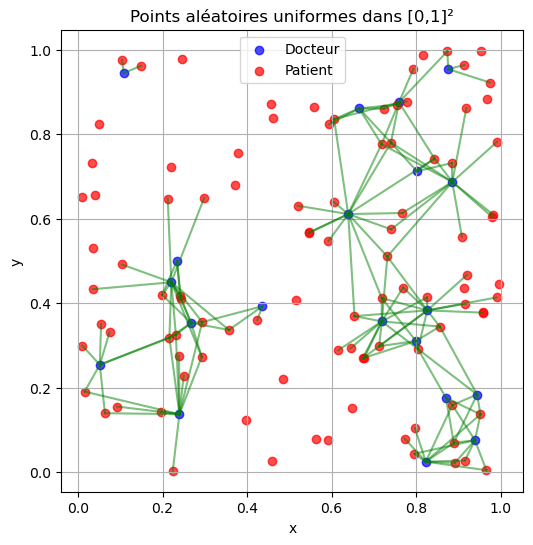

In [762]:
#On représente les Yij sur un graphe
plt.figure(figsize=(6, 6))
plt.scatter(position_docteur[0], position_docteur[1], color='blue', alpha=0.7, label="Docteur")
plt.scatter(position_patient[0], position_patient[1], color='red', alpha=0.7, label="Patient")
for i in range(nombre_patient):
    for j in range(nombre_docteur):
        if lien[i,j] == 1:
            plt.plot([position_docteur[0][j], position_patient[0][i]], [position_docteur[1][j], position_patient[1][i]], 'k-',alpha=0.5,color="green")
plt.title("Points aléatoires uniformes dans [0,1]²")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axis('square')
plt.legend()
plt.show()

In [763]:
#On va maintenant faire la regression de Yij sur Xij, alpha_i et psi_j
model = LogisticRegression()
model.fit(matrice_distance.reshape(-1,1),lien.reshape(-1,1))
y_pred = model.predict(lien.reshape(-1,1))

/opt/conda/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [764]:
x = sm.add_constant(matrice_distance.reshape(-1,1))
model = sm.Probit(lien.reshape(-1,1), x)
result = model.fit()
print(result.summary())
proba= result.predict(x)
print(proba)
y_pred = (proba >= 0.5).astype(int)
y_pred

Optimization terminated successfully.
         Current function value: 0.074650
         Iterations 11
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2000
Model:                         Probit   Df Residuals:                     1998
Method:                           MLE   Df Model:                            1
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.7171
Time:                        14:58:21   Log-Likelihood:                -149.30
converged:                       True   LL-Null:                       -527.73
Covariance Type:            nonrobust   LLR p-value:                1.294e-166
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7214      0.252     10.789      0.000       2.227       3.216
x1           -18.5215      1

array([0, 0, 0, ..., 0, 0, 0], shape=(2000,))

In [765]:
#On regarde la distance entre la prédiction et la réalité
mse = mean_squared_error(lien.reshape(-1,1), y_pred)
mse

0.0325

In [766]:
patient_ids = np.repeat(np.arange(nombre_patient), nombre_docteur)
doctor_ids = np.tile(np.arange(nombre_docteur), nombre_patient)

df = pd.DataFrame({
    'patient_id': patient_ids,
    'doctor_id': doctor_ids,
    'distance': matrice_distance.flatten(),
    'link': lien.flatten()
})
df

,patient_id,doctor_id,distance,link
0,0,0,0.499718,0.0
1,0,1,0.672569,0.0
2,0,2,0.274460,0.0
3,0,3,0.909014,0.0
4,0,4,0.389469,0.0
...,...,...,...,...
1995,99,15,0.340436,0.0
1996,99,16,0.876301,0.0
1997,99,17,1.120449,0.0
1998,99,18,0.855076,0.0


### **On génère Y = DY\* **

In [767]:
y_etoile = np.zeros((nombre_patient, nombre_docteur))

for j in range(nombre_docteur):
    for i in range(nombre_patient):
        y_etoile[i,j] = 0.30-2*matrice_distance[i,j]-alpha[i]+psi[j]+np.random.normal(0,1)
y_etoile

array([[-0.33435686, -2.30985014, -1.47755391, ..., -1.14834733,
        -1.90486719,  0.11476313],
       [-0.17801326, -1.77523233, -0.90486238, ..., -0.59538788,
        -0.82826474, -0.26855181],
       [ 0.10788799,  0.4900261 , -0.07489598, ..., -2.60242928,
        -2.20268302, -1.25001256],
       ...,
       [-2.18431035, -0.7301587 , -1.14430214, ..., -1.31938615,
         1.35977875,  0.20262799],
       [-0.73827854, -1.52757202, -1.817572  , ...,  0.87581337,
        -3.42452477, -2.73505948],
       [-1.70254038, -1.26529412,  1.44337114, ..., -2.37582465,
        -1.62109233, -1.7367371 ]], shape=(100, 20))

In [768]:
y = np.zeros((nombre_patient, nombre_docteur))

for i in range(nombre_patient):
    for j in range(nombre_docteur):
        y[i,j] = y_etoile[i,j]*lien[i,j]
y

array([[-0.        , -0.        , -0.        , ..., -0.        ,
        -1.90486719,  0.        ],
       [-0.        , -0.        , -0.        , ..., -0.59538788,
        -0.        , -0.        ],
       [ 0.        ,  0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       ...,
       [-0.        , -0.        , -0.        , ..., -1.31938615,
         0.        ,  0.20262799],
       [-0.        , -0.        , -0.        , ...,  0.        ,
        -0.        , -0.        ],
       [-0.        , -0.        ,  0.        , ..., -0.        ,
        -0.        , -0.        ]], shape=(100, 20))

In [769]:
X_tild = np.zeros((nombre_patient*nombre_docteur,2))
for i in range(nombre_patient):
    for j in range(nombre_docteur):
        X_tild[i*nombre_docteur+j][0]=1
        X_tild[i*nombre_docteur+j][1]=matrice_distance[i,j]

X_tild

array([[1.        , 0.49971836],
       [1.        , 0.67256883],
       [1.        , 0.27446032],
       ...,
       [1.        , 1.12044928],
       [1.        , 0.85507602],
       [1.        , 1.00664717]], shape=(2000, 2))

In [770]:
A_tild = np.zeros((nombre_patient*nombre_docteur,nombre_patient))
for i in range(nombre_patient*nombre_docteur):
        n = i//nombre_docteur
        A_tild[i][n]=1

print(A_tild)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [771]:
B_tild = np.zeros((nombre_patient*nombre_docteur,nombre_docteur))
for i in range(nombre_patient*nombre_docteur):
        n = i%nombre_docteur
        if n<nombre_docteur:
                B_tild[i][n]=1
print(B_tild)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [772]:
Y_etoile = np.zeros((nombre_patient*nombre_docteur,1))

for j in range(nombre_docteur):
    for i in range(nombre_patient):
        Y_etoile[i*j][0] = 0.3-2*matrice_distance[i,j]-alpha[i]+psi[j]+np.random.normal(0,1)
Y_etoile

array([[-0.53744841],
       [-1.21228104],
       [-1.51945495],
       ...,
       [ 0.        ],
       [ 0.        ],
       [ 0.        ]], shape=(2000, 1))

In [773]:
S = np.zeros((int(lien.sum()),nombre_patient*nombre_docteur))
l=0
while l<int(lien.sum()):
    for i in range(nombre_patient):
        for j in range(nombre_docteur):
            if lien[i,j] == 1:
                S[l][i*nombre_docteur+j] = 1
                l+=1

S

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(148, 2000))

In [774]:
A = S@A_tild
B = S@B_tild
X = S@X_tild
Y = S@Y_etoile

In [775]:
G = np.hstack([A, B])

In [776]:
C = np.eye(int(lien.sum()))-G@G.T

In [777]:
Beta_chapeau = np.linalg.inv(X.T@C@X)@X.T@C@Y

In [778]:
Effets_fixes = (np.linalg.pinv(G.T@G))@(G.T@(Y-X@Beta_chapeau))

In [779]:
alpha_chapeau = Effets_fixes[:nombre_patient]

In [780]:
psi_chapeau = Effets_fixes[nombre_patient:]

In [781]:
Beta_chapeau

array([[-0.52616319],
       [ 0.67935456]])

In [782]:
D_chapeau = np.zeros((nombre_patient,nombre_docteur))
for j in range(nombre_docteur):
    for i in range(nombre_patient):
        D_chapeau[i,j] = 1 if Beta_chapeau[0]+Beta_chapeau[1]*matrice_distance[i,j]+alpha_chapeau[i]+psi_chapeau[j]>0 else 0

In [783]:
D_chapeau

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 1., 0., 1.]], shape=(100, 20))

/tmp/ipykernel_4204/3246131117.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([position_docteur[0][j], position_patient[0][i]], [position_docteur[1][j], position_patient[1][i]], 'k-',alpha=0.5,color="green")


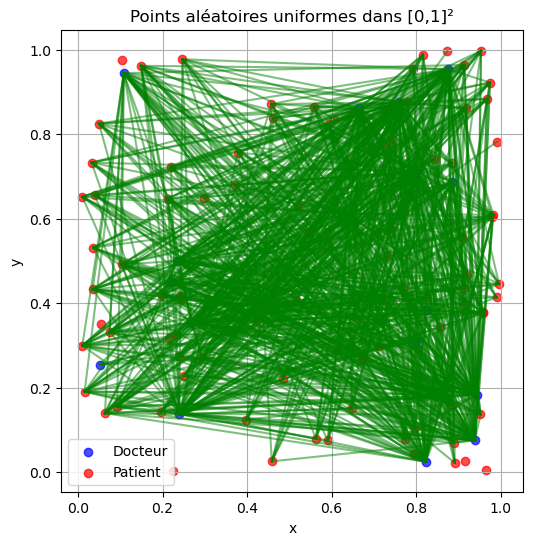

In [784]:
#On représente les Yij sur un graphe
plt.figure(figsize=(6, 6))
plt.scatter(position_docteur[0], position_docteur[1], color='blue', alpha=0.7, label="Docteur")
plt.scatter(position_patient[0], position_patient[1], color='red', alpha=0.7, label="Patient")
for i in range(nombre_patient):
    for j in range(nombre_docteur):
        if D_chapeau[i,j] == 1:
            plt.plot([position_docteur[0][j], position_patient[0][i]], [position_docteur[1][j], position_patient[1][i]], 'k-',alpha=0.5,color="green")
plt.title("Points aléatoires uniformes dans [0,1]²")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axis('square')
plt.legend()
plt.show()

In [785]:
int(((lien-D_chapeau)**2).sum())/(nombre_patient*nombre_docteur)

0.5325

In [786]:
#a refaire
import statsmodels.formula.api as smf

model = smf.ols("link ~ distance + C(patient_id) + C(doctor_id)", data=df).fit()
print(model.summary())
mse = mean_squared_error(lien.reshape(-1,1), model.predict(df))
mse
!pip install linearmodels
print(df.columns)
from linearmodels.panel import PanelOLS
import pandas as pd
df_2 = df.set_index(['patient_id', 'doctor_id'])
mod = PanelOLS.from_formula('link ~ 1 + distance + EntityEffects + TimeEffects', data=df_2)
res = mod.fit()
y_pred = res.predict().fitted_values
mse = mean_squared_error(lien.reshape(-1,1), y_pred)
mse

PatsyError: Error evaluating factor: TypeError: 'numpy.ndarray' object is not callable
    link ~ distance + C(patient_id) + C(doctor_id)
                                      ^^^^^^^^^^^^